<a href="https://colab.research.google.com/github/duybluemind1988/Data-science/blob/master/Marketing_chap_05_Product_Analytics_online_retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Load basic library
import re
import numpy as np
import time
import pandas as pd
from tensorflow import random
from sklearn.externals import joblib 
from scipy import stats

# import require packages for plotting
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt 
import plotly
from plotly import tools
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as sns
sns.set()
import altair as alt


# Load Keras
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.models import Sequential
from keras import backend as K

from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Dense
from keras.metrics import categorical_crossentropy


#Load sklearn
from sklearn import preprocessing as pp
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle

from sklearn.metrics import log_loss 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score,balanced_accuracy_score
from sklearn.metrics import average_precision_score 

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, NMF

#ML normal ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#ML ensembles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#

#Special
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

#Load visual neural:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

# cluster
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import cluster, mixture
from sklearn.neighbors import kneighbors_graph
from itertools import cycle, islice

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import Birch
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture

#import fastcluster
#import hdbscan
from scipy.cluster.hierarchy import dendrogram, cophenet, fcluster
from scipy.spatial.distance import pdist

# PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import SparsePCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import FastICA 
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import MiniBatchDictionaryLearning #other
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection

#imblearn library
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from collections import Counter

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecati

# Load Data

https://archive.ics.uci.edu/ml/datasets/online+retail

Data Set Information:

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.



Attribute Information:

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.

In [3]:
df=pd.read_excel('https://github.com/mrinmaisharma/Online-Retail-Dataset/blob/master/OnlineRetail.xlsx?raw=true',sep=';')

In [41]:
df.nunique()

InvoiceNo      19889
StockCode       3938
Description     4074
Quantity         383
InvoiceDate    18292
UnitPrice       1260
CustomerID      4298
Country           38
Sales           4780
dtype: int64

In [4]:
print(df.shape)
df.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Product Analytics

In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Quantity Distribution

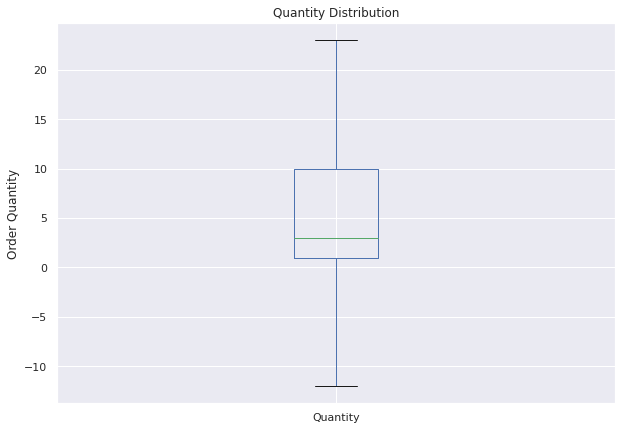

In [5]:
ax = df['Quantity'].plot.box(
    showfliers=False,
    grid=True,
    figsize=(10, 7)
)

ax.set_ylabel('Order Quantity')
ax.set_title('Quantity Distribution')

plt.suptitle("")
plt.show()

We will remove all quantity < 0

In [14]:
pd.DataFrame(df['Quantity'].describe())

,Quantity
count,541909.000000
mean,9.552250
std,218.081158
min,-80995.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,80995.000000


In [15]:
df.loc[df['Quantity'] > 0].shape

(531285, 8)

In [16]:
df.shape

(541909, 8)

In [18]:
df.loc[df['Quantity'] > 0].shape[0] / df.shape[0]

0.9803952324098696

In [19]:
df = df.loc[df['Quantity'] > 0]

## Time-series Number of Order

Before we look at product-level data, as a marketer for an e-commerce business, it will be
beneficial to have a better understanding of the overall time series trends in the revenue
and the numbers of orders or purchases. This will help us understand whether the business
is growing or shrinking in terms of both the overall revenue and the numbers of orders we
receive over time.

In [22]:
df.shape

(531285, 8)

In [25]:
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 531285, dtype: datetime64[ns]

In [21]:
df['InvoiceDate'].nunique()

19052

In [23]:
df['InvoiceNo'].nunique()

20728

In [20]:
monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()
monthly_orders_df
# or: df.groupby('month')['InvoiceNo'].count()

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
2011-12-31     839
Freq: M, Name: InvoiceNo, dtype: int64

As you can see from this code, we are using the resample and nunique functions that we
have not used in the previous chapters. The resample function resamples and converts
time series data into the frequency we desire. In our example, we are resampling our time
series data into monthly time series data, by using 'M' as our target frequency and
counting the number of distinct or unique invoice numbers. This way, we can get the
number of unique purchases or orders month-on-month. The resulting DataFrame looks
like the following screenshot:

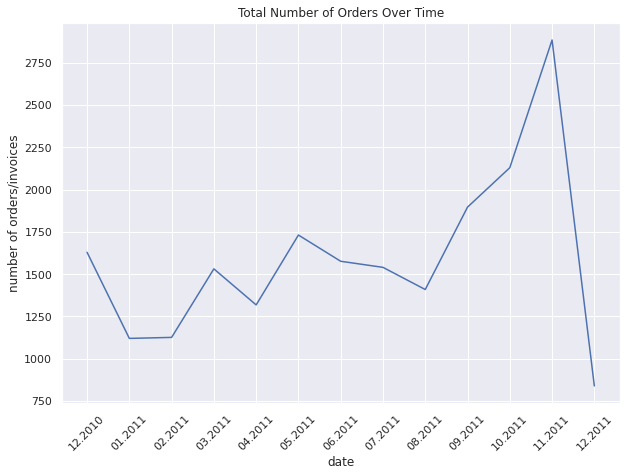

In [24]:

ax = pd.DataFrame(monthly_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

# Good technique for xticks
plt.xticks(
    range(len(monthly_orders_df.index)), 
    [x.strftime('%m.%Y') for x in monthly_orders_df.index], 
    rotation=45
)

plt.show()

We will remove all order > 1/12/2011 due to not representation data (not enought data)

One thing that is noticeable from this chart is that there is a sudden radical drop in the
number of orders in December 2011. If you look closely at the data, this is simply because
we do not have the data for the full month of December 2011. We can verify this by using
the following code:

In [26]:
invoice_dates = df.loc[
    df['InvoiceDate'] >= '2011-12-01',
    'InvoiceDate'
]

In [27]:
print('Min date: %s\nMax date: %s' % (invoice_dates.min(), invoice_dates.max()))

Min date: 2011-12-01 08:33:00
Max date: 2011-12-09 12:50:00


As you can see from this output, we only have the data from December 1, to December 9,2011. It would be a misrepresentation if we use this data for analyzing December sales and
revenue. For further analyses, we will disregard any data from December 1, 2011. You can
use the following code to remove those data points:

In [28]:
df.loc[df['InvoiceDate'] < '2011-12-01'].shape

(506150, 8)

In [29]:
df.shape

(531285, 8)

In [30]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [31]:
monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()
monthly_orders_df

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
Freq: M, Name: InvoiceNo, dtype: int64

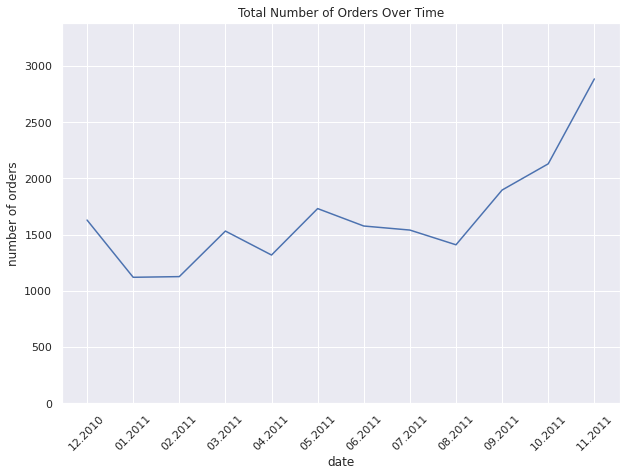

In [32]:
ax = pd.DataFrame(monthly_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders')
ax.set_title('Total Number of Orders Over Time')

ax.set_ylim([0, max(monthly_orders_df.values)+500])

plt.xticks(
    range(len(monthly_orders_df.index)), 
    [x.strftime('%m.%Y') for x in monthly_orders_df.index], 
    rotation=45
)

plt.show()

Let's take a closer look at this chart. The monthly number of orders seems to float around
1,500 from December 2010 to August 2011, and then increases significantly from September
2011, and almost doubles by November 2011. One explanation for this could be that the
business is actually growing significantly from September 2011. Another explanation could
be seasonal effects. In e-commerce businesses, it is not rare to see spikes in sales as it
approaches the end of the year. Typically, sales rise significantly from October to January
for many e-commerce businesses, and without the data from the previous year, it is difficult
to conclude whether this spike in sales is due to a growth in business or due to seasonal
effects. When you are analyzing your data, we advise you to compare the current year's
data against the previous year's data.


## Time-series Revenue

In [33]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [34]:
monthly_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('M').sum()
monthly_revenue_df

InvoiceDate
2010-12-31     823746.140
2011-01-31     691364.560
2011-02-28     523631.890
2011-03-31     717639.360
2011-04-30     537808.621
2011-05-31     770536.020
2011-06-30     761739.900
2011-07-31     719221.191
2011-08-31     737014.260
2011-09-30    1058590.172
2011-10-31    1154979.300
2011-11-30    1509496.330
Freq: M, Name: Sales, dtype: float64

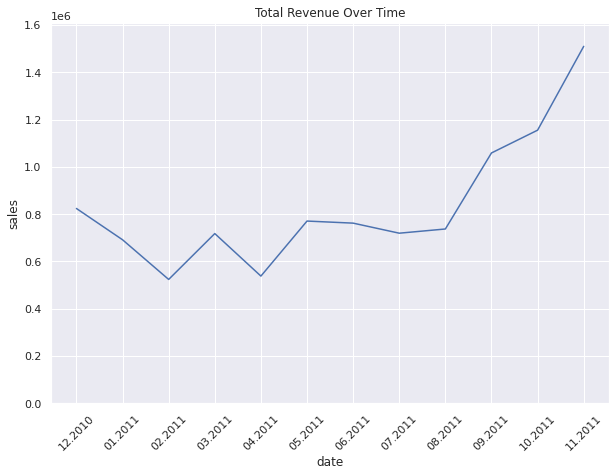

In [35]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue Over Time')

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

plt.xticks(
    range(len(monthly_revenue_df.index)), 
    [x.strftime('%m.%Y') for x in monthly_revenue_df.index], 
    rotation=45
)

plt.show()

We see a similar pattern to the previous monthly Total Number of Orders Over Time chart
in this monthly revenue chart. The monthly revenue floats around 700,000 from December
2010 to August 2011 and then it increases significantly from September 2011. As discussed
before, to verify whether this significant increase in sales and revenue is due to a growth in
business or due to seasonal effects, we need to look further back in the sales history and
compare the current year's sales against the previous year's sales.

These types of general and broad time series analyses can help marketers gain a better
understanding of the overall performance of the business and identify any potential
problems that might be occurring within the business. It is generally a good idea to start
with broader analyses, and then drill down into more granular and specific parts of the
business for further product analytics

## Time-series Repeat Customers

Another important factor of a successful business is how well it is retaining customers and
how many repeat purchases and customers it has. In this section, we are going to analyze
the number of monthly repeat purchases and how much of the monthly revenue is
attributable to these repeat purchases and customers. A typical strong and stable business
has a steady stream of sales from existing customers. Let's see how much of the sales are
from repeat and existing customers of the online retail business that we are currently
analyzing in this chapter.

In [42]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


As you might have noticed from this snapshot of the data, there are multiple records for
one purchase order (InvoiceNo). However, what we need is the aggregate data for each
order, so that one record in the DataFrame represents one purchase order. We can
aggregate this raw data for each InvoiceNo by using the following code:

In [47]:
invoice_customer_df = df.groupby(
    by=['InvoiceNo', 'InvoiceDate']
).agg({
    'Sales': sum,
    'CustomerID': max, # specific by each invoice, no different min or max
    'Country': max,# specific by each invoice, no different min or max
}).reset_index()

invoice_customer_df

,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850.0,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850.0,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047.0,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047.0,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047.0,United Kingdom
...,...,...,...,...,...
19926,579881,2011-11-30 17:22:00,905.52,12429.0,Denmark
19927,579885,2011-11-30 17:37:00,1075.36,15444.0,United Kingdom
19928,A563185,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
19929,A563186,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom


In [48]:
monthly_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

monthly_repeat_customers_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

Let's take a closer look at the groupby function in this code. Here, we group by two
conditions—pd.Grouper(freq='M') and CustomerID. The first groupby
condition, pd.Grouper(freq='M'), groups the data by the index, InvoiceDate, into each
month. Then, we group this data by each CustomerID. Using the filter function, we can
subselect the data by a custom rule. Here, the filtering rule, lambda x: len(x) > 1,
means we want to retrieve those with more than one record in the group. In other words,
we want to retrieve only those customers with more than one order in a given month.
Lastly, we resample and aggregate by each month and count the number of unique
customers in each month by using resample('M') and nunique.

In [50]:
monthly_unique_customers_df = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()
monthly_unique_customers_df

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: M, Name: CustomerID, dtype: int64

In [51]:
monthly_repeat_percentage = monthly_repeat_customers_df/monthly_unique_customers_df*100.0
monthly_repeat_percentage

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
Freq: M, Name: CustomerID, dtype: float64

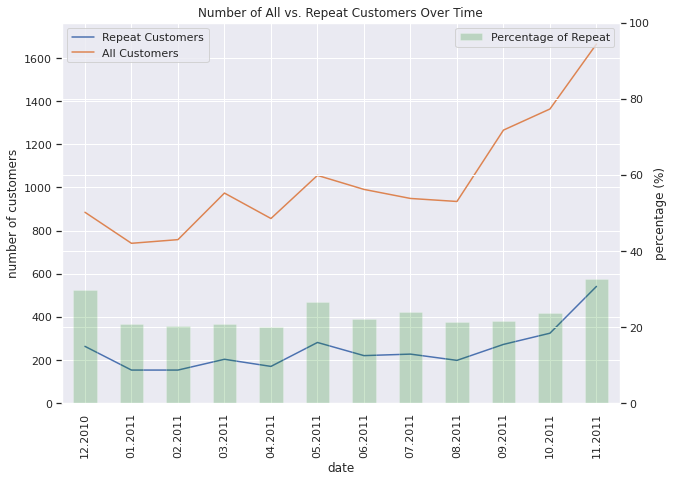

In [52]:
# plot monthly_repeat_customers_df (repeat customer)
ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(
    figsize=(10,7)
)
# plot monthly_unique_customers_df (all customer)
pd.DataFrame(monthly_unique_customers_df.values).plot(
    ax=ax,
    grid=True
)

# plot monthly_repeat_percentage
ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(
    ax=ax,
    grid=True,
    secondary_y=True,
    color='green',
    alpha=0.2
)

ax.set_xlabel('date')
ax.set_ylabel('number of customers')
ax.set_title('Number of All vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])
ax2.set_ylim([0, 100])

plt.xticks(
    range(len(monthly_repeat_customers_df.index)), 
    [x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index], 
    rotation=45
)

plt.show()

As you can see from this chart, the numbers of both repeat and all customers start to rise
significantly from September 2011. The percentage of Repeat Customers seems to stay
pretty consistent at about 20 to 30%. This online retail business will benefit from this steady
stream of Repeat Customers, as they will help the business to generate a stable stream of
sales. Let's now analyze how much of the monthly revenue comes from these Repeat
Customers

## Revenue from Repeat Customers

In [53]:
monthly_rev_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']
monthly_rev_repeat_customers_df 

InvoiceDate
2010-12-31    359170.60
2011-01-31    222124.00
2011-02-28    191229.37
2011-03-31    267390.48
2011-04-30    195474.18
2011-05-31    378197.04
2011-06-30    376307.26
2011-07-31    317475.00
2011-08-31    317134.25
2011-09-30    500663.36
2011-10-31    574006.87
2011-11-30    713775.85
Freq: M, Name: Sales, dtype: float64

The only difference between this code and the previous code is the aggregate function, sum,
that follows resample('M'). In the previous case, when we were computing the number
of monthly repeat customers, we used the nunique function. However, this time we are
using the sum function to add all the sales from repeat customers for a given month. For
visualization, you can use the following code:

In [55]:
monthly_rev_perc_repeat_customers_df = monthly_rev_repeat_customers_df/monthly_revenue_df * 100.0
monthly_rev_perc_repeat_customers_df

InvoiceDate
2010-12-31    43.602098
2011-01-31    32.128346
2011-02-28    36.519810
2011-03-31    37.259729
2011-04-30    36.346420
2011-05-31    49.082331
2011-06-30    49.401017
2011-07-31    44.141497
2011-08-31    43.029595
2011-09-30    47.295296
2011-10-31    49.698455
2011-11-30    47.285696
Freq: M, Name: Sales, dtype: float64

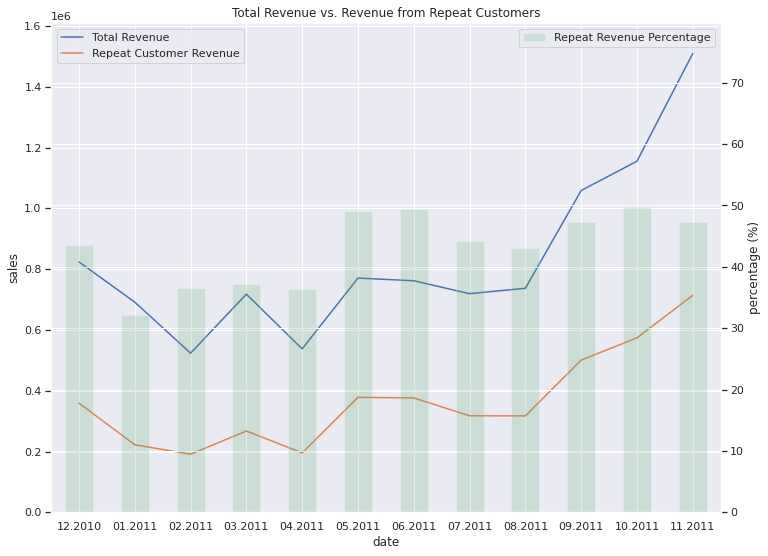

In [56]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(12,9))

pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(
    ax=ax,
    grid=True,
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')

ax.legend(['Total Revenue', 'Repeat Customer Revenue'])

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

ax2 = ax.twinx()

pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(
    ax=ax2,
    kind='bar',
    color='g',
    alpha=0.2
)

ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])

ax2.set_xticklabels([
    x.strftime('%m.%Y') for x in monthly_rev_perc_repeat_customers_df.index
])

plt.show()

We see a similar pattern as before, where there is a significant increase in the revenue from
September 2011. One interesting thing to notice here is the percentage of the monthly
revenue from repeat customers. We have seen that roughly 20-30% of the customers who
made purchases are repeat customers. However, in this graph, we can see that roughly
40-50% of the Total Revenue is from repeat customers. In other words, roughly half of the
revenue was driven by the 20-30% of the customer base who are repeat customers. This
shows how important it is to retain existing customers.

## Popular Items Over Time

In [57]:
date_item_df = pd.DataFrame(
    df.set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
)
date_item_df

Quantity
InvoiceDate StockCode          
2010-12-31  10002           251
            10120            16
            10125           154
            10133           130
            10135           411
...                         ...
2011-11-30  C2              173
            DCGSSGIRL         1
            DOT              47
            M              3894
            POST           1262

[31701 rows x 1 columns]

In [58]:
# Rank items by the last month sales
last_month_sorted_df = date_item_df.loc['2011-11-30'].sort_values(
    by='Quantity', ascending=False
).reset_index()

last_month_sorted_df

,InvoiceDate,StockCode,Quantity
0,2011-11-30,23084,14954
1,2011-11-30,84826,12551
2,2011-11-30,22197,12460
3,2011-11-30,22086,7908
4,2011-11-30,85099B,5909
...,...,...,...
2941,2011-11-30,84549,1
2942,2011-11-30,84527,1
2943,2011-11-30,90082B,1
2944,2011-11-30,90082D,1


In [59]:
# Regroup for top 5 items
date_item_df = pd.DataFrame(
    df.loc[
        df['StockCode'].isin([23084, 84826, 22197, 22086, '85099B'])
    ].set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
)
date_item_df

Quantity
InvoiceDate StockCode          
2010-12-31  22086          2460
            22197          2738
            84826           366
            85099B         2152
2011-01-31  22086            24
            22197          1824
            84826           480
            85099B         2747
2011-02-28  22086             5
            22197          2666
            84826            66
            85099B         3080
2011-03-31  22086            87
            22197          2803
            84826            60
            85099B         5282
2011-04-30  22086            13
            22197          1869
            84826             1
            85099B         2456
2011-05-31  22086            17
            22197          6849
            23084          1131
            85099B         3621
2011-06-30  22086           344
            22197          2095
            23084          1713
            84826             4
            85099B         3682
2011-07-31  22086           383
            22197          1876
            23084           318
            84826             2
            85099B         3129
2011-08-31  22086           490
            22197          5421
            23084          2267
            84826            72
            85099B         5502
2011-09-30  22086          2106
            22197          4196
            23084           680
            85099B         4401
2011-10-31  22086          3429
            22197          5907
            23084          6348
            84826            11
            85099B         5412
2011-11-30  22086          7908
            22197         12460
            23084         14954
            84826         12551
            85099B         5909

In [60]:

trending_itmes_df = date_item_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)

trending_itmes_df = trending_itmes_df.reset_index()
trending_itmes_df = trending_itmes_df.set_index('InvoiceDate')
trending_itmes_df.columns = trending_itmes_df.columns.droplevel(0)

trending_itmes_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,2460.0,2738.0,0.0,366.0,2152.0
2011-01-31,24.0,1824.0,0.0,480.0,2747.0
2011-02-28,5.0,2666.0,0.0,66.0,3080.0
2011-03-31,87.0,2803.0,0.0,60.0,5282.0
2011-04-30,13.0,1869.0,0.0,1.0,2456.0
2011-05-31,17.0,6849.0,1131.0,0.0,3621.0
2011-06-30,344.0,2095.0,1713.0,4.0,3682.0
2011-07-31,383.0,1876.0,318.0,2.0,3129.0
2011-08-31,490.0,5421.0,2267.0,72.0,5502.0


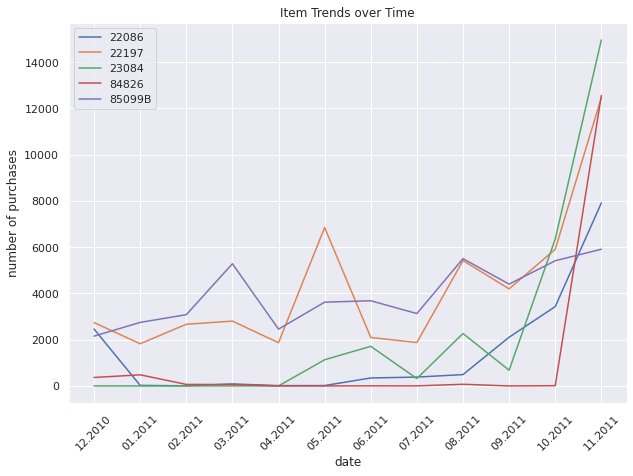

In [61]:
ax = pd.DataFrame(trending_itmes_df.values).plot(
    figsize=(10,7),
    grid=True,
)

ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_title('Item Trends over Time')

ax.legend(trending_itmes_df.columns, loc='upper left')

plt.xticks(
    range(len(trending_itmes_df.index)), 
    [x.strftime('%m.%Y') for x in trending_itmes_df.index], 
    rotation=45
)

plt.show()

Let's take a closer look at this time series plot. The sales of these five products spiked in
November 2011, especially, the sales of the product with the stock code, 85099B, which
were close to 0 from February 2011 to October 2011. Then, it suddenly spiked in November 2011. It might be worth taking a closer look into what might have driven this spike. It could
be an item that is highly sensitive to seasonality, such that this item becomes very popular
during November, or it could also be due to a genuine change in trends that led this item to
become suddenly more popular than before.

The popularity of the rest of the top five products, 22086, 22197, 23084, and 84826, seem to
have built up in the few months prior to November 2011. As a marketer, it would be
worthwhile taking a closer look at the potential drivers behind this buildup of rising
popularity for these items. You could look at whether these items are typically more
popular in colder seasons or whether there is a rising trend for these specific items in the
marke

Analyzing the trends and changes in the popularity of products not only helps you
understand what your customers like and purchase the most, but also helps you tailor your
marketing messages. For example, you can recommend these items with rising popularity
in your marketing emails, calls, or advertisements to improve customer engagement. As it
has been shown that your customers are more interested and more likely to purchase these
items, you might get higher marketing engagement from your customers when you market
these items more and you might eventually get higher conversion rates when you target
your customers with these trending items. Using these popular and trending items is one
way to build a product recommendation engine, which we are going to expand on and
experiment with thoroughly in the next chapter.

In [69]:
df['StockCode'].value_counts(ascending=False)[:10]

85123A    2203
85099B    2061
22423     1957
47566     1679
20725     1551
84879     1442
22720     1359
22197     1358
21212     1333
22383     1294
Name: StockCode, dtype: int64